In [1]:
## libraries-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm_api

In [120]:
## loading dataset--

train= pd.read_csv("D:/hr analytics/train.csv")
test= pd.read_csv("D:/hr analytics/test.csv")

In [3]:
## Some descriptive data analysis--
print(train.shape)
train.head()

(54808, 14)


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [121]:
train.drop("employee_id",1,inplace=True)

In [5]:
## univariate and bivariate analysis----

Index(['department', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')


C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ASUS\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


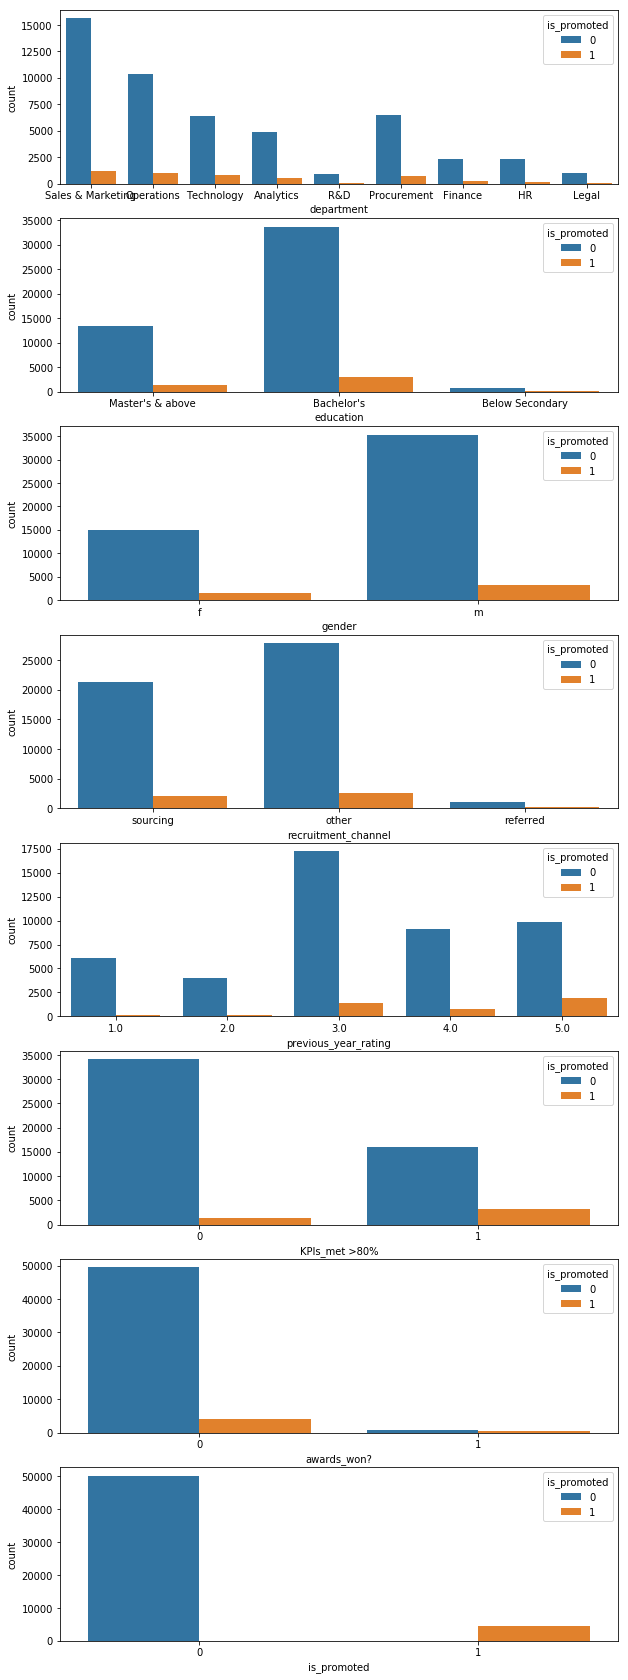

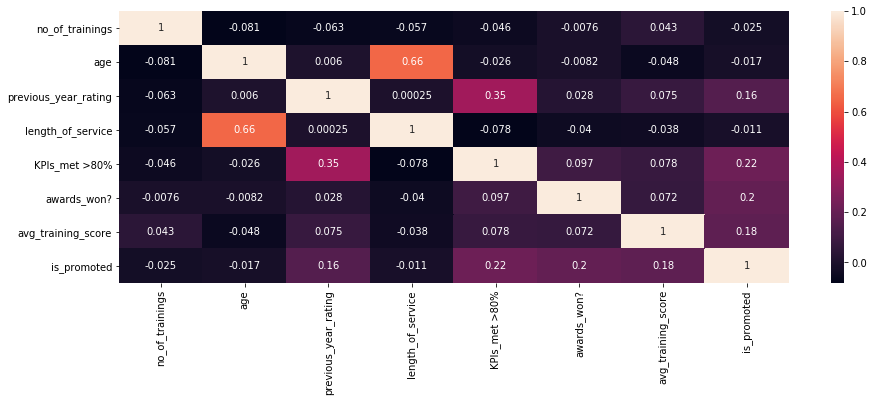

<Figure size 1440x1800 with 0 Axes>

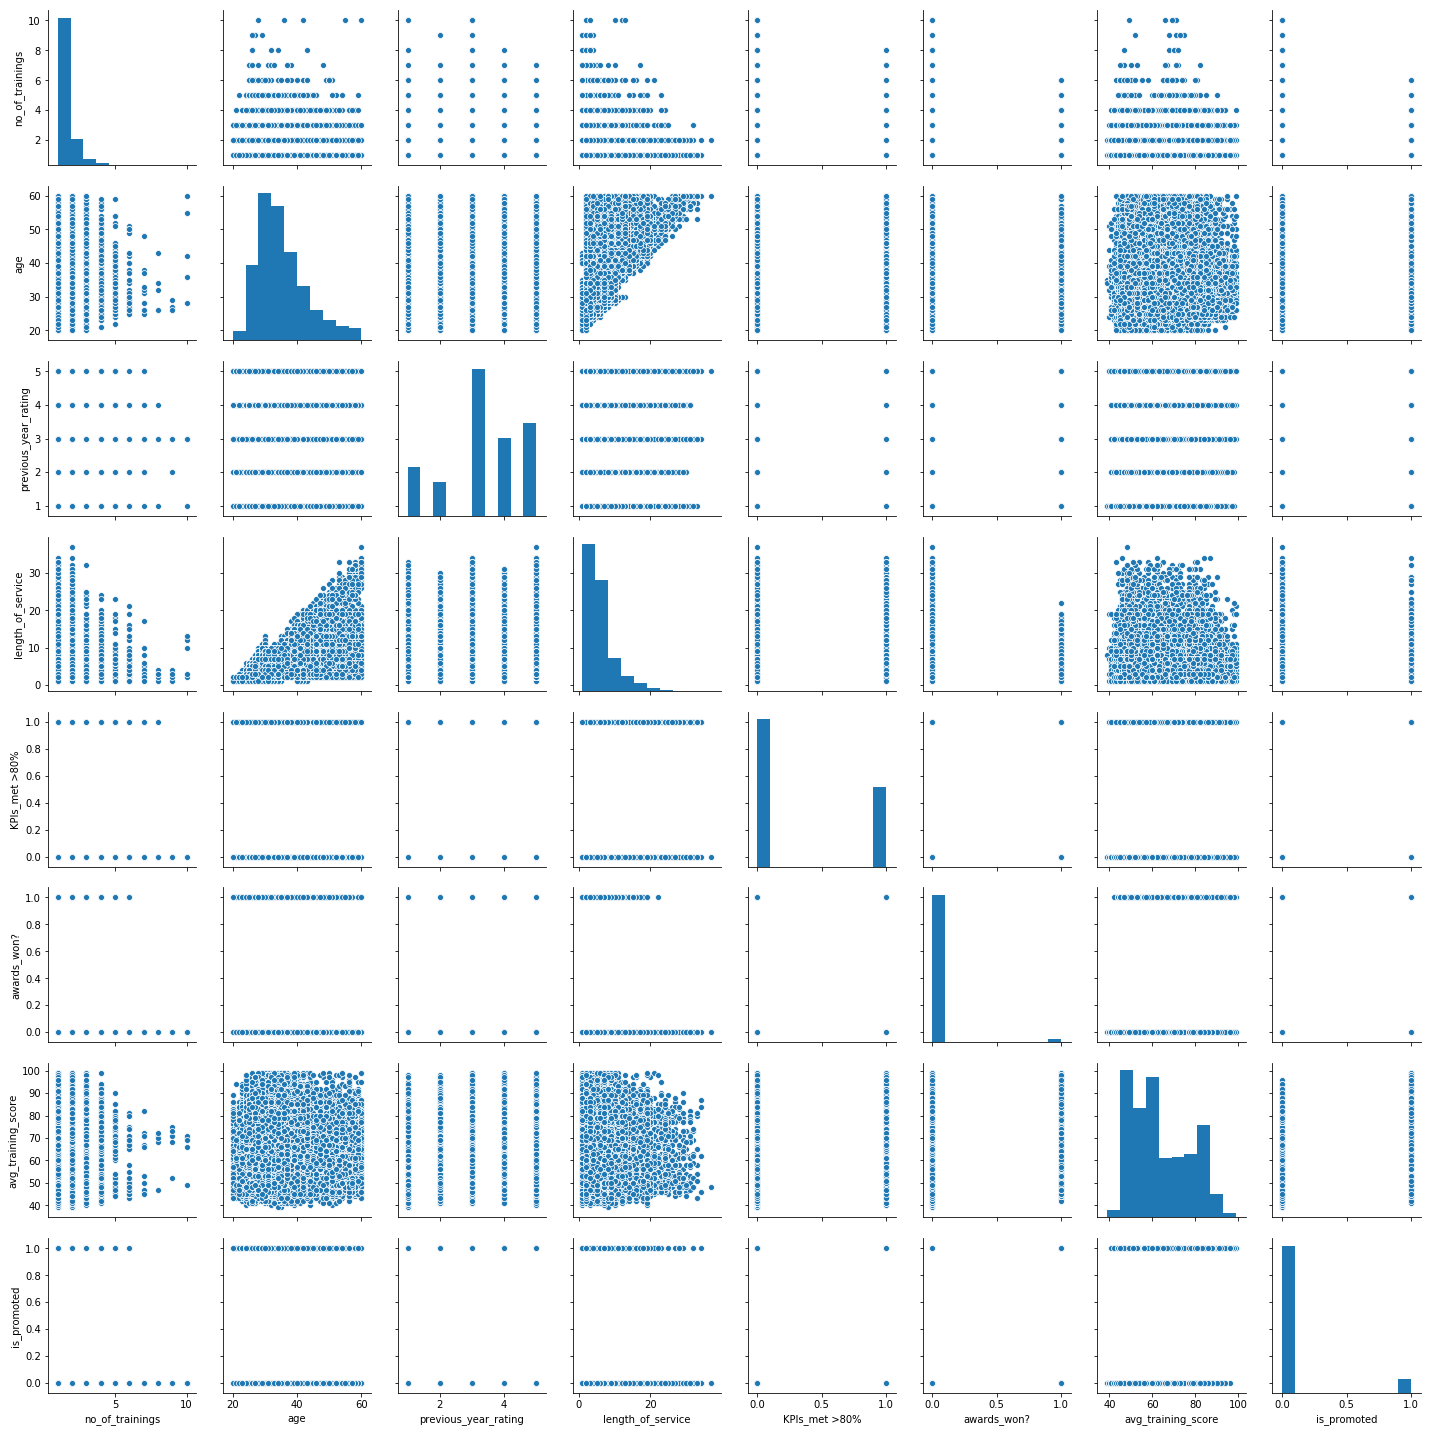

In [25]:
# columns=train.select_dtypes(np.object).columns
columns=train.columns
columns=columns.drop(["region","no_of_trainings","age","length_of_service","avg_training_score"])
# columns=columns.append(["previous_year_rating","KPIs_met >80%","awards_won?"])
print(columns)
plt.figure(figsize=(10,30))
for i in range(0,columns.size):
    
    plt.subplot(columns.size,1,i+1)
    sns.countplot(x=train[columns[i]], hue=train["is_promoted"])
    plt.xlabel(columns[i])
    
plt.figure(figsize=(15,5))    
sns.heatmap(train.corr(),annot=True)


<Figure size 1440x1800 with 0 Axes>

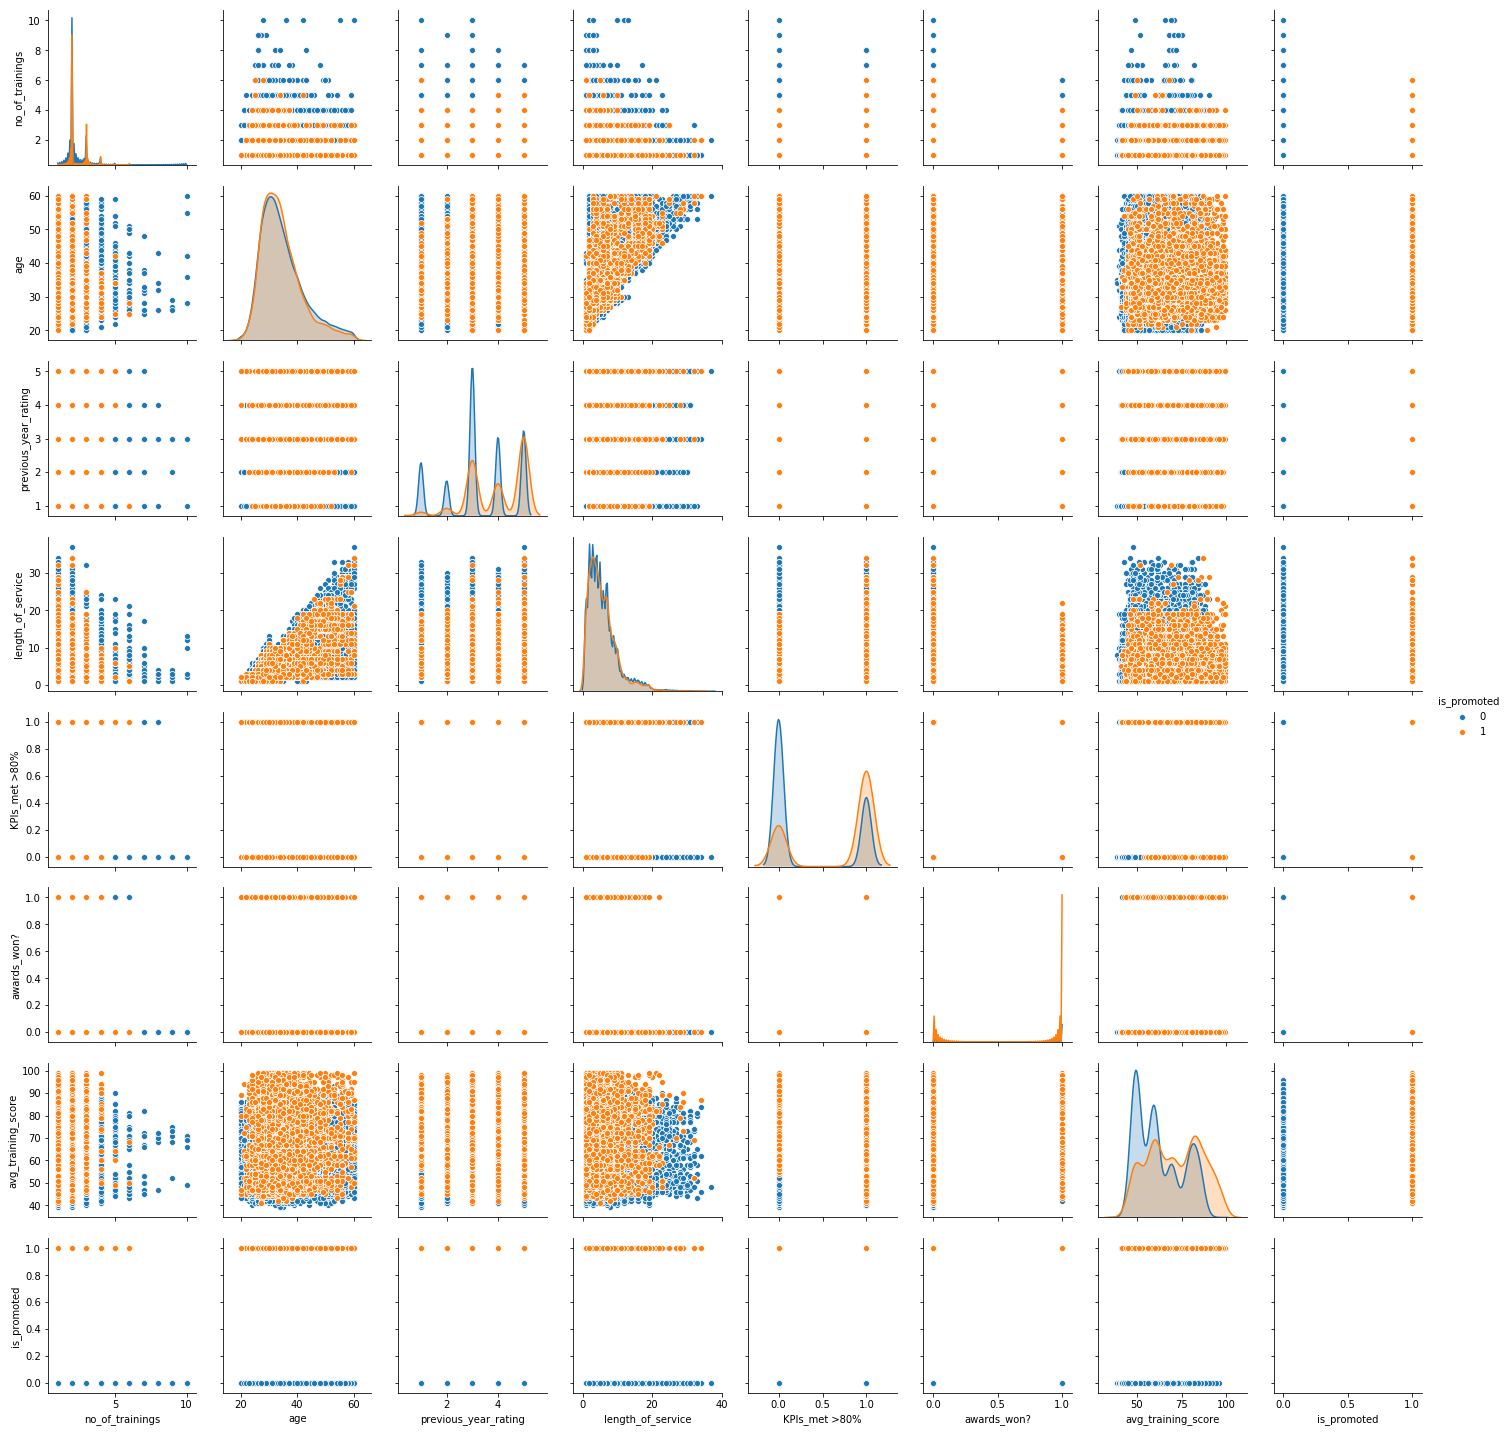

In [30]:
plt.figure(figsize=(20,25))
sns.pairplot(data=train,hue="is_promoted",diag_kind='kde')

#### Observations for heatmap---
1. Age and length of service are highly correlated. Age has the least correlation with our target and logically as well. 
2. Previous year rating and KPIs met are also correlated.

#### Observation from countplot --

1. our Target is very imbalanced. 


## dealing with Null values---------------------------------------------------

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    54808 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [32]:
## Checking Null value imputation for previous_year_rating- no of years of experience =1, so filling rating by 0 

In [122]:
train["previous_year_rating"]= train["previous_year_rating"].fillna(0)

In [35]:
## filling null values of education

In [48]:
education_notnull=train[~(train["education"].isnull())]
education_notnull.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


Index(['department', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')


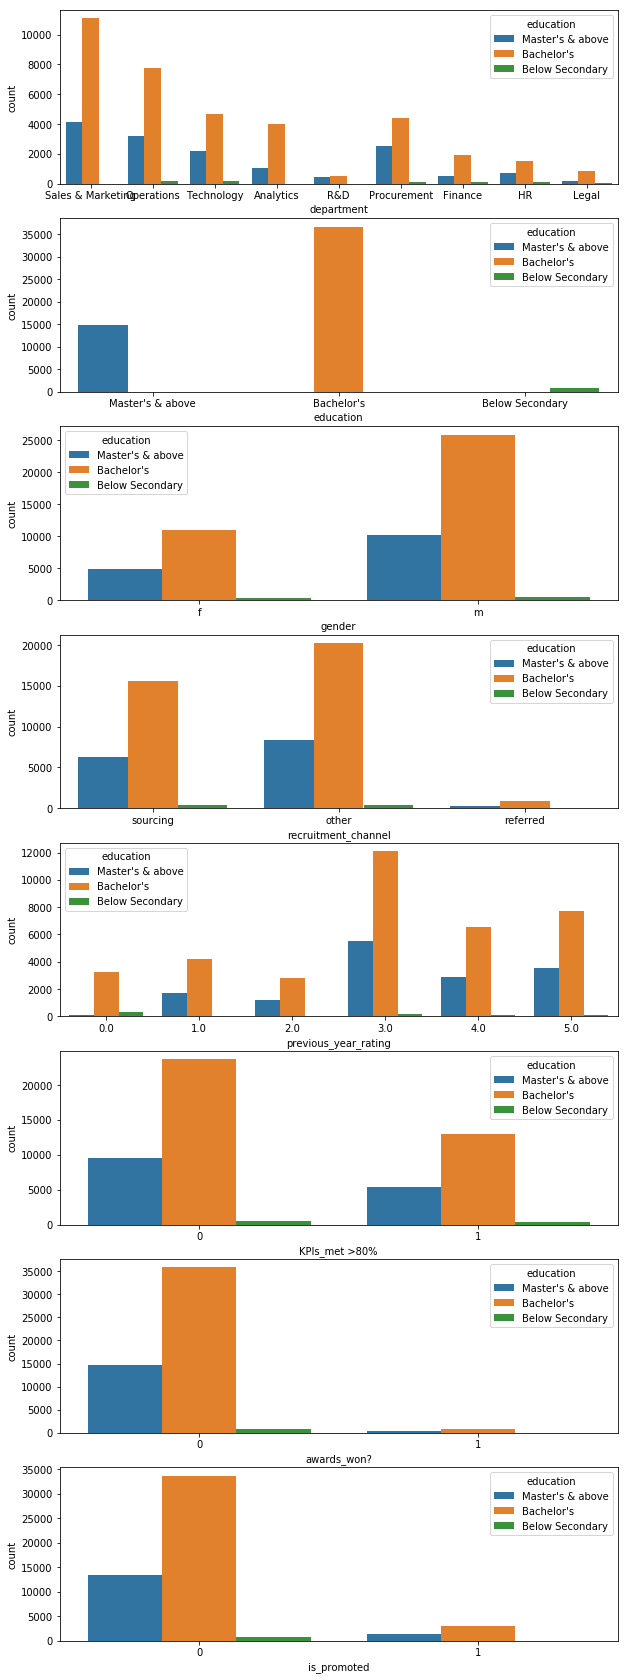

In [53]:
columns=education_null.columns
columns=columns.drop(["region","no_of_trainings","age","length_of_service","avg_training_score"])
# columns=columns.append(["previous_year_rating","KPIs_met >80%","awards_won?"])
print(columns)
plt.figure(figsize=(10,30))
for i in range(0,columns.size):
    
    plt.subplot(columns.size,1,i+1)
    sns.countplot(x=education_notnull[columns[i]],hue=education_notnull["education"])
    plt.xlabel(columns[i])

In [55]:
education_notnull.groupby("department")["education"].value_counts()

department         education       
Analytics          Bachelor's           3978
                   Master's & above     1037
Finance            Bachelor's           1895
                   Master's & above      499
                   Below Secondary       106
HR                 Bachelor's           1525
                   Master's & above      733
                   Below Secondary       128
Legal              Bachelor's            814
                   Master's & above      156
                   Below Secondary        65
Operations         Bachelor's           7781
                   Master's & above     3165
                   Below Secondary       176
Procurement        Bachelor's           4393
                   Master's & above     2544
                   Below Secondary       129
R&D                Bachelor's            542
                   Master's & above      429
Sales & Marketing  Bachelor's          11099
                   Master's & above     4166
Technology         

Analytics,R&D,Sales & Marketing --------> below secondary eductaion

In [60]:
education_notnull.groupby("is_promoted")["education"].value_counts()


is_promoted  education       
0            Bachelor's          33661
             Master's & above    13454
             Below Secondary       738
1            Bachelor's           3008
             Master's & above     1471
             Below Secondary        67
Name: education, dtype: int64

In [63]:
education_null=train[(train["education"].isnull())]
print(education_null.shape)
education_null.head()

(2409, 13)


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,0.0,1,0,0,77,0
21,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0


In [123]:
train["education"].fillna(method="ffill",inplace=True)

In [124]:
train.isnull().sum().sum()

0

In [125]:
## droping region
train.drop("region",1,inplace=True)

In [68]:
train.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
## One Hot encoding- 

In [126]:
train_encoded= pd.get_dummies(train,drop_first=True)

In [69]:
## Checking multicollinearity-

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(train_encoded.values,i) for i in range(train_encoded.shape[1])]
pd.DataFrame({"vif": vif[0:]}, index= train_encoded.columns)

,vif
no_of_trainings,5.310945
previous_year_rating,6.113790
length_of_service,3.296571
KPIs_met >80%,1.787999
awards_won?,1.071885
avg_training_score,14.561761
is_promoted,1.212303
department_Finance,1.285913
department_HR,1.234004
department_Legal,1.113154


In [128]:
# droping age,avg_training_score- 
train_encoded.drop("age",1,inplace=True)

In [81]:
train_encoded.head()

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,5.0,8,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,1,5.0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,3.0,7,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
3,2,1.0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,3.0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [82]:
## Lets check pvalues-

In [132]:
from statsmodels.tools import add_constant as add_constant
train_encoded_const = add_constant(train_encoded)

xtrain = train_encoded.drop("is_promoted",1)
ytrain=train_encoded["is_promoted"]

model = sm_api.Logit(ytrain,xtrain.drop(["recruitment_channel_referred","education_Below Secondary"],1)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.270633
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                54808
Model:                          Logit   Df Residuals:                    54791
Method:                           MLE   Df Model:                           16
Date:                Sun, 15 Sep 2019   Pseudo R-squ.:                 0.07069
Time:                        23:36:47   Log-Likelihood:                -14833.
converged:                       True   LL-Null:                       -15961.
                                        LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
no_of_trainings                 -0.6411      0.040    -16.212      0.000      -0.719      -0.564
previous_year_rating             0.0812      0.011      7.210      0.000       0.059       0.103
length_of_service               -0.0308      0.004     -6.995      0.000      -0.039      -0.022
KPIs_met >80%                    1.1923      0.033     35.634      0.000       1.127       1.258
awards_won?                      2.0174      0.063     31.921      0.000       1.893       2.141
avg_training_score              -0.0158      0.001    -16.937      0.000      -0.018      -0.014
department_Finance              -1.3295      0.083    -16.083      0.000      -1.491      -1.167
department_HR                   -1.9423      0.097    -20.107      0.000      -2.132      -1.753
department_Legal                -1.7843      0.149    -11.996      0.000      -2.076      -1.493
department_Operations           -1.3071      0.049    -26.866      0.000      -1.402      -1.212
department_Procurement          -0.9866      0.056    -17.758      0.000      -1.095      -0.878
department_R&D                  -1.0289      0.135     -7.620      0.000      -1.293      -0.764
department_Sales & Marketing    -1.3631      0.046    -29.770      0.000      -1.453      -1.273
department_Technology           -0.6204      0.056    -11.154      0.000      -0.729      -0.511
education_Master's & above       0.1312      0.035      3.727      0.000       0.062       0.200
gender_m                        -0.3359      0.034     -9.776      0.000      -0.403      -0.269
recruitment_channel_sourcing    -0.1331      0.032     -4.194      0.000      -0.195      -0.071
================================================================================================
"""

In [133]:
train_encoded.drop(["recruitment_channel_referred","education_Below Secondary"],1,inplace=True)

In [134]:
train_encoded.shape


(54808, 18)

In [135]:
train_encoded.head()

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Master's & above,gender_m,recruitment_channel_sourcing
0,1,5.0,8,1,0,49,0,0,0,0,0,0,0,1,0,1,0,1
1,1,5.0,4,0,0,60,0,0,0,0,1,0,0,0,0,0,1,0
2,1,3.0,7,0,0,50,0,0,0,0,0,0,0,1,0,0,1,1
3,2,1.0,10,0,0,50,0,0,0,0,0,0,0,1,0,0,1,0
4,1,3.0,2,0,0,73,0,0,0,0,0,0,0,0,1,0,1,0


In [92]:
## SMOTE-------------

In [93]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [136]:
xtrain = train_encoded.drop("is_promoted",1)
ytrain=train_encoded["is_promoted"]

In [137]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123, ratio=1.0)
Xtrain, ytrain = smote.fit_sample(xtrain, ytrain)

In [103]:
## Preparing our test data-----------
test.head()

,department,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,Bachelor's,m,sourcing,1,0.0,1,1,0,77
1,HR,Bachelor's,f,other,1,3.0,5,0,0,51
2,Sales & Marketing,Bachelor's,m,other,1,1.0,4,0,0,47
3,Procurement,Bachelor's,f,other,3,2.0,9,0,0,65
4,Finance,Bachelor's,m,sourcing,1,4.0,7,0,0,61


In [138]:
test.drop("employee_id",1,inplace=True)

In [139]:
test.education.fillna(method="ffill",inplace=True)

In [140]:
test.previous_year_rating.fillna(0,inplace=True)

In [141]:
test.isnull().sum().sum()

0

In [146]:
test.drop("region",1,inplace=True)

In [147]:
test_encoded = pd.get_dummies(test,drop_first=True)

In [148]:
test_encoded.drop(["recruitment_channel_referred","education_Below Secondary"],1,inplace=True)

In [149]:
test_encoded.shape

(23490, 17)

In [150]:
Xtrain.shape

(100280, 17)

In [111]:
## Applying Decision tree---------------------------------------------------------------

In [112]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()


In [151]:
y_pred_tree=tree.fit(Xtrain,ytrain).predict(test_encoded)
y_pred_tree

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [153]:
test= pd.read_csv("D:/hr analytics/test.csv")
test["is_promoted"] = y_pred_tree
result=test[["employee_id","is_promoted"]]

result.head()
result.to_csv("tree_upscalled1.csv", index=False)

In [154]:
## score==0.417

In [155]:
## Crossvalidation-----------------------------------

In [162]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

param_dist = {'max_depth': [2, 3, 4,5],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(tree, cv = 10,param_grid=param_dist)

cv_rf.fit(Xtrain, ytrain)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 5, 'max_features': None}


In [163]:
tree.set_params(criterion = 'gini',max_features = None,max_depth = 3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [164]:
y_pred_tree=tree.fit(Xtrain,ytrain).predict(test_encoded)
y_pred_tree

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [166]:
test= pd.read_csv("D:/hr analytics/test.csv")
test["is_promoted"] = y_pred_tree
result=test[["employee_id","is_promoted"]]

result.head()
result.to_csv("tree_upscalled_cv1.csv", index=False)

## Random Forest---------------------------------------------

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
forest = RandomForestClassifier()

In [169]:
y_pred_forest=forest.fit(Xtrain,ytrain).predict(test_encoded)
y_pred_forest

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [171]:
test= pd.read_csv("D:/hr analytics/test.csv")
test["is_promoted"] = y_pred_forest
result=test[["employee_id","is_promoted"]]

result.head()
result.to_csv("forest_withscalling.csv", index=False)

In [172]:
## Score---0.4455

## Cross Validation on Random Forest---------------------------

In [173]:

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(forest, cv = 10,param_grid=param_dist)

cv_rf.fit(Xtrain, ytrain)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}


In [174]:
forest.set_params(criterion = 'gini',max_features = 'log2',max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
ypred_cv=forest.predict(test_encoded)
ypred_cv

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [176]:
test= pd.read_csv("D:/hr analytics/test.csv")
test["is_promoted"] = ypred_cv
result=test[["employee_id","is_promoted"]]

result.head()
result.to_csv("forest_withscalling_cv.csv", index=False)

In [ ]:
0.44559